#in this analysis we will perform sales analsyis 

In [1]:
# the first step is to import necessary packages  to be used in this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data into jupitor notebook workspace
data= pd.read_excel("January to November Sales Data with ID 222.xlsx")

In [7]:
#visualize the data by looking at the head of the data, the shape of the data and the columns in the data
data.head()


,Type,Date,Num,Item Name,Name,Qty,Sales Price,Amount,Unique ID
0,Sales Receipt,2022-01-03,46162,Widal Kit,Winnie Crystal,1,600.0,600.0,PEF1475
1,Sales Receipt,2022-01-03,46163,MRDT,GOLGOTHA MEDICAL CENTRE,2,1300.0,2600.0,PEF464
2,Sales Receipt,2022-01-03,46164,oncall strip,Isaac,2,600.0,1200.0,PEF555
3,Sales Receipt,2022-01-03,46164,red top vacutainer,Isaac,2,500.0,1000.0,PEF555
4,Sales Receipt,2022-01-03,46164,PDT strips,Isaac,2,300.0,600.0,PEF555


In [8]:
data.columns

Index(['Type', 'Date', 'Num', 'Item Name', 'Name', 'Qty', 'Sales Price',
       'Amount', 'Unique ID'],
      dtype='object')

In [9]:
data.shape

(21090, 9)

In [10]:
# check the summary of the data
data.describe()

,Num,Qty,Sales Price,Amount
count,21090.000000,21090.000000,21090.000000,21090.000000
mean,42333.291702,42.223850,1924.950199,5745.991045
std,14992.520966,430.479441,12054.095705,20220.820351
min,230.000000,1.000000,0.000000,0.000000
25%,45936.250000,1.000000,300.000000,750.000000
50%,48614.000000,2.000000,700.000000,1800.000000
75%,50865.000000,5.000000,1900.000000,5000.000000
max,61512.000000,25000.000000,850000.000000,850000.000000


In [11]:
#Next step is cleaning of the data. frist we rename the rows of the data.
data.rename(columns={"Date":"Invoice Date","Num":"Invoice Number","Name":"Customer Name","Unique ID":"Customer ID"},inplace=True)


In [12]:
#let check the appearance of the data  after changing the column name
data.head()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID
0,Sales Receipt,2022-01-03,46162,Widal Kit,Winnie Crystal,1,600.0,600.0,PEF1475
1,Sales Receipt,2022-01-03,46163,MRDT,GOLGOTHA MEDICAL CENTRE,2,1300.0,2600.0,PEF464
2,Sales Receipt,2022-01-03,46164,oncall strip,Isaac,2,600.0,1200.0,PEF555
3,Sales Receipt,2022-01-03,46164,red top vacutainer,Isaac,2,500.0,1000.0,PEF555
4,Sales Receipt,2022-01-03,46164,PDT strips,Isaac,2,300.0,600.0,PEF555


In [13]:
# next data cleaning step is to check for null values
data.isnull().sum()

Type               0
Invoice Date       0
Invoice Number     0
Item Name          1
Customer Name     46
Qty                0
Sales Price        0
Amount             0
Customer ID       46
dtype: int64

In [14]:
# now there are 46 missing values on customer name and customer ID and therefore we should drop the null values in this case.
data=data.dropna(subset="Customer Name")

In [16]:
# let check if all null values are dropped
data.isnull().sum()

Type              0
Invoice Date      0
Invoice Number    0
Item Name         1
Customer Name     0
Qty               0
Sales Price       0
Amount            0
Customer ID       0
dtype: int64

 #only one null value is left on item name but it is negligible.
#Now since the data is clean we dive into analysis

In [18]:
#the first thing to analyse is the monthly total revenue 
# first we import the datetime package
import datetime as dt
# using datetime we extract month from invoice date
data["Month"]=data["Invoice Date"].dt.month

In [21]:
# let check the tail of the data after extracting month from the data
data.tail()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Month
21085,Sales Receipt,2022-11-30,52658,Polypots,Blossom Medical Laboratory,300,3.0,900.0,PEF138,11
21086,Sales Receipt,2022-11-30,52658,EDTA Tubes,Blossom Medical Laboratory,1,700.0,700.0,PEF138,11
21087,Sales Receipt,2022-11-30,52658,Plain Tube With Clot,Blossom Medical Laboratory,1,700.0,700.0,PEF138,11
21088,Sales Receipt,2022-11-30,52659,EDTA Tubes,Timoline Enterprises,10,600.0,6000.0,PEF1395,11
21089,Sales Receipt,2022-11-30,52659,Plain Tube With Clot,Timoline Enterprises,10,600.0,6000.0,PEF1395,11


In [22]:
#now that we have extracted month from invoice date the next step is to group data and obtain the total monthly revenue
Monthly_revenue=data.groupby("Month").sum()["Amount"]

In [23]:
Monthly_revenue

Month
1     9.680296e+06
2     9.906753e+06
3     8.963688e+06
4     1.125849e+07
5     8.879578e+06
6     1.360428e+07
7     8.888695e+06
8     1.173663e+07
9     9.591465e+06
10    1.191225e+07
11    1.648432e+07
Name: Amount, dtype: float64

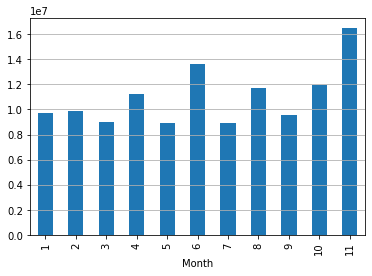

In [26]:
# lets visualize the monthly revenue in a bar chart
Monthly_revenue.plot(kind="bar")
#add grids to the graph 
plt.grid(axis="y")

In [31]:
# the best performing product based on the number of customers and insert a dataframe
Product_with_highest_demand=pd.DataFrame(data.groupby("Item Name").count()["Customer ID"])

In [32]:
Product_with_highest_demand

,Customer ID
Item Name,
Biochemistry Control Serum Level 1 Human,1
KN95 Face Mask without valves,1
10cc Syringe,12
10cc Syringe+Needle,1
17*LD,1
...,...
white Screen,1
white tile,1
wood glue,1


In [39]:
#sort the product based on demand in descending order (Highest to the lowest)
Product_with_highest_demand=Product_with_highest_demand.sort_values("Customer ID",ascending=False)

In [40]:
Product_with_highest_demand

,Customer ID
Item Name,
EDTA Tubes,1155
PDT strips,964
VDRL/Syphillis strip,799
oncall strip,749
H.Pylori Antigen,735
...,...
catheter size 18 3000g,1
WBC Compipette Chamber,1
Vicryl 3/0 R/C,1


<AxesSubplot:xlabel='Item Name'>

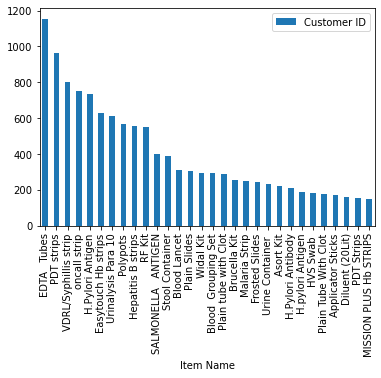

In [42]:
#let plot the top 30 most demanded products
Product_with_highest_demand[:30].plot(kind="bar")


In [49]:
#the most loyal customers
Most_loyal_customers=pd.DataFrame(data.groupby("Customer Name").count()["Invoice Number"])

In [53]:
Most_loyal_customers

,Invoice Number
Customer Name,
Esther Kamau,1
Nkunkwe,1
Nukta Tredding,1
OBTMAL CLINIC,1
GD Hellene Africa,1
...,...
Silver Medics,229
Bridgewell Scientific,258
Healthwise,324


In [54]:
#plot top 30 most loyal Customers based on the number of purchases from January to november 2022
Most_loyal_customers=Most_loyal_customers.sort_values("Invoice Number",ascending=False)

In [55]:
Most_loyal_customers

,Invoice Number
Customer Name,
MEDISPOT PLATINUM,519
Alfurqan Pharmacy,326
Healthwise,324
Bridgewell Scientific,258
Silver Medics,229
...,...
isaac Muriungi,1
glenfield hospital,1
Tecko,1


<AxesSubplot:xlabel='Customer Name'>

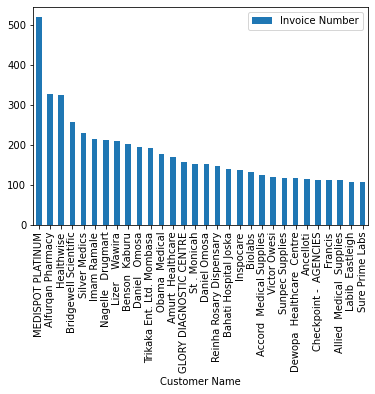

In [56]:
Most_loyal_customers[:30].plot(kind="bar")

In [59]:
# the month of November had a tremendous performance which were its most selling product
# we have to slice the data of novemner fro the entire data
start_date="2022-11-01"
end_date="2022-11-30"
Nov=(data["Invoice Date"]>start_date)&(data["Invoice Date"]<=end_date)
Nov_data=data.loc[Nov]

In [60]:
#let check the head and tail of november data
Nov_data.head()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Month
19155,Sales Receipt,2022-11-02,52036,Single Arm Ceiling,mobiset Limited,2,107500.0,215000.0,PEF968,11
19156,Sales Receipt,2022-11-02,52038,Plain Sides,Alculabs,1,150.0,150.0,PEF020,11
19157,Sales Receipt,2022-11-02,52039,main board for full haemogram,Bahati Hospital Joska,1,50000.0,50000.0,PEF081,11
19158,Sales Receipt,2022-11-02,52040,Plain Tube Without clot,Daniel Omosa,5,600.0,3000.0,PEF238,11
19159,Sales Receipt,2022-11-02,52040,EDTA Tubes,Daniel Omosa,2,600.0,1200.0,PEF238,11


In [61]:
Nov_data.tail()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Month
21085,Sales Receipt,2022-11-30,52658,Polypots,Blossom Medical Laboratory,300,3.0,900.0,PEF138,11
21086,Sales Receipt,2022-11-30,52658,EDTA Tubes,Blossom Medical Laboratory,1,700.0,700.0,PEF138,11
21087,Sales Receipt,2022-11-30,52658,Plain Tube With Clot,Blossom Medical Laboratory,1,700.0,700.0,PEF138,11
21088,Sales Receipt,2022-11-30,52659,EDTA Tubes,Timoline Enterprises,10,600.0,6000.0,PEF1395,11
21089,Sales Receipt,2022-11-30,52659,Plain Tube With Clot,Timoline Enterprises,10,600.0,6000.0,PEF1395,11


In [63]:
# Let analyze the daily sale of November
# to analyze the daily sales in November we have to extract date from Invoice Dates
Nov_data["date"]=Nov_data["Invoice Date"].dt.day

C:\Users\Admin\AppData\Local\Temp\ipykernel_3660\2743861411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_data["date"]=Nov_data["Invoice Date"].dt.day


In [64]:
# let now thech the head of November Data
Nov_data.head()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Month,date
19155,Sales Receipt,2022-11-02,52036,Single Arm Ceiling,mobiset Limited,2,107500.0,215000.0,PEF968,11,2
19156,Sales Receipt,2022-11-02,52038,Plain Sides,Alculabs,1,150.0,150.0,PEF020,11,2
19157,Sales Receipt,2022-11-02,52039,main board for full haemogram,Bahati Hospital Joska,1,50000.0,50000.0,PEF081,11,2
19158,Sales Receipt,2022-11-02,52040,Plain Tube Without clot,Daniel Omosa,5,600.0,3000.0,PEF238,11,2
19159,Sales Receipt,2022-11-02,52040,EDTA Tubes,Daniel Omosa,2,600.0,1200.0,PEF238,11,2


In [73]:
# the daily sales of the month of November
Nov_daily_sales=(Nov_data.groupby("date").sum()["Amount"])

In [70]:
Nov_daily_sales

date
2      528830.0
3     2045830.0
4      738145.0
5      120600.0
7      839585.0
8      226020.0
9      633010.0
10    1003490.0
11     540710.0
12      35630.0
14     600390.0
15    1794105.0
16     346030.0
17     444400.0
18     291040.0
19      88140.0
21     512785.0
22    1259640.0
23     595240.0
24     346570.0
25     291420.0
26     323005.0
28     736820.0
29    1200010.0
30     515510.0
Name: Amount, dtype: float64

<AxesSubplot:xlabel='date'>

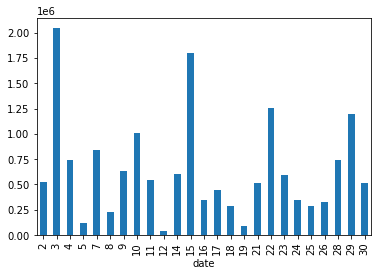

In [68]:
# lets plot the trend of November daily sales
Nov_daily_sales.plot(kind="bar")

In [76]:
# most_selling product November
most_selling_product_Nov=pd.DataFrame(Nov_data.groupby("Item Name").count()["Invoice Number"])

In [79]:
Most_selling_product=most_selling_product_Nov.sort_values("Invoice Number", ascending=False)

In [80]:
# top 30 most selling products in November 
Most_selling_product[:30]


,Invoice Number
Item Name,
EDTA Tubes,139
H.pylori Antigen,85
Plain Tube With Clot,83
PDT Strips,65
oncall strip,61
VDRL/Syphillis strip,58
RF Kit,56
Easytouch Hb strips,54
URINALYSIS PARA 10,50


<AxesSubplot:xlabel='Item Name'>

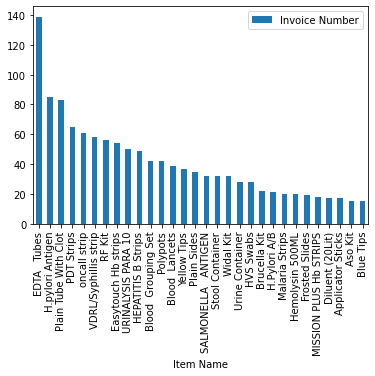

In [81]:
Most_selling_product[:30].plot(kind="bar")


In [83]:
# moving back to the entire data which product had the highest average number of customers
Item_customers = data.groupby(['Item Name', 'Month'])['Customer Name'].nunique().reset_index()

In [84]:
Item_customers

,Item Name,Month,Customer Name
0,Biochemistry Control Serum Level 1 Human,11,1
1,KN95 Face Mask without valves,1,1
2,10cc Syringe,1,1
3,10cc Syringe,2,1
4,10cc Syringe,4,2
...,...,...,...
3728,wood glue,11,1
3729,yellow tubes,1,1
3730,yellow tubes,4,1
3731,yellow tubes,10,1


In [96]:
average_monthly_customers_per_product = pd.DataFrame(Item_customers.groupby('Item Name')['Customer Name'].mean())

In [97]:
average_monthly_customers_per_product

,Customer Name
Item Name,
Biochemistry Control Serum Level 1 Human,1.000000
KN95 Face Mask without valves,1.000000
10cc Syringe,1.714286
10cc Syringe+Needle,1.000000
17*LD,1.000000
...,...
white Screen,1.000000
white tile,1.000000
wood glue,1.000000


In [98]:
average_monthly_customers_per_product=average_customers_per_product.sort_values("Customer Name",ascending=False)

In [100]:
average_monthly_customers_per_product

,Customer Name
Item Name,
EDTA Tubes,79.636364
H.pylori Antigen,71.000000
PDT strips,71.000000
Plain Tube With Clot,68.000000
H.Pylori Antigen,64.666667
...,...
Surgical Scissors Curved,1.000000
Stretcher Troley,1.000000
Stretcher Army Type,1.000000


<AxesSubplot:xlabel='Item Name'>

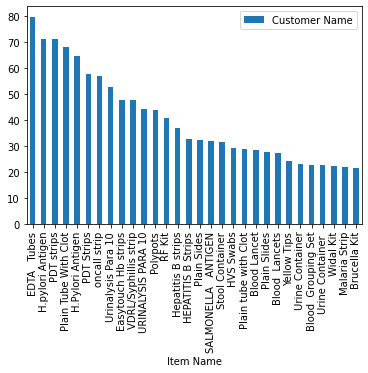

In [101]:
# top 30 item with the highest average monthly number of customers per month
average_monthly_customers_per_product[:30].plot(kind="bar")